EE18btech11030

M.Varun Sankar


Part a,b 

In [53]:
import numpy as np
from numpy import linalg as LA
import cvxpy as cp
import matplotlib.pyplot as plt


def convex_optimisation(n,N):
    a = cp.Variable(n)
    x = np.linspace(-1,1,2*N+1)
    def cost_pre(n,b,a):
        cost = 0
        for j in range(n):
            cost += a[j]*(b**j)
        return cost

    cost = 0
    cout = 0
    for i in range(0, 2*N+1, 1):
        cout += 1
        temp = x[i]**n - cost_pre(n,x[i],a)
        cost += temp ** 2
    #print(cout)
    objective = cp.Minimize(cost)
    constraints = []

    prob = cp.Problem(objective, constraints)
    prob.solve()

    return (prob.value,a.value)

n_5 = convex_optimisation(5,100)
print("Optimal cost for n= 5 and N = 100:",n_5[0])
print("a values :",n_5[1],"\n")

n_10 = convex_optimisation(10,100)
print("Optimal cost for n= 10 and N = 100:",n_10[0])
print("a values :",n_10[1],"\n")

n_20 = convex_optimisation(20,100)
print("Optimal cost for n = 20 and N = 100:",n_20[0])
print("a values :",n_20[1],"\n")


Optimal cost for n= 5 and N = 100: 0.30929400823621367
a values : [ 6.44282686e-18 -2.42800796e-01 -1.32007445e-16  1.12205556e+00
  1.89941202e-16] 

Optimal cost for n= 10 and N = 100: 0.0003217798458649965
a values : [ 1.42786660e-03  3.63876155e-17 -7.78219252e-02 -8.82227362e-16
  6.68330583e-01  4.90198539e-15 -1.98671456e+00 -9.03033666e-15
  2.39036842e+00  5.11018724e-15] 

Optimal cost for n = 20 and N = 100: 4.208443483162634e-08
a values : [-9.08991417e-06  5.08031143e-13  8.17685296e-04 -7.26156858e-11
 -9.35580716e-03  1.47822247e-09  5.33931085e-03 -1.09761148e-08
  2.77822852e-01  3.79743976e-08 -1.20803914e+00 -6.40332800e-08
  1.70022354e+00  4.17359552e-08  3.70923089e-01  1.64860235e-08
 -3.36675095e+00 -3.59481558e-08  3.22898148e+00  1.33560899e-08] 



Part c 

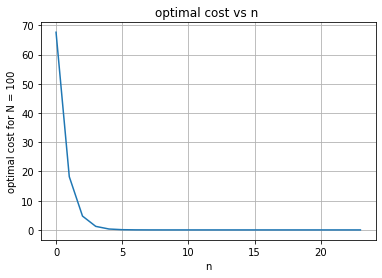

In [54]:
new = []
for i in range(1,25):
    new.append(convex_optimisation(i,100)[0])
plt.grid()
plt.xlabel("n")
plt.ylabel("optimal cost for N = 100")
plt.title("optimal cost vs n ")
plt.plot(new)
plt.show()

Part a,b for new cost function

In [55]:
def convex_optimisation_new(n,N):
    x = np.linspace(-1,1,2*N+1)
    a_new = cp.Variable(n)

    def cost_new_pre(n,b,a_new):
        cost = 0
        for j in range(n):
            cost += a_new[j]*(b**j)
        return cost

    new_cost = 0
    for i in range(0, 2*N+1, 1):
        new_cost += cp.norm(x[i]**n - cost_new_pre(n,x[i],a_new),1)

    objective = cp.Minimize(new_cost)
    constraints = []

    prob = cp.Problem(objective, constraints)
    prob.solve()

    return (prob.value,a_new.value)

n_5 = convex_optimisation_new(5,100)
print("Optimal cost for n= 5 and N = 100:",n_5[0])
print("a values :",n_5[1],"\n")

n_10 = convex_optimisation_new(10,100)
print("Optimal cost for n= 10 and N = 100:",n_10[0])
print("a values :",n_10[1],"\n")

n_20 = convex_optimisation_new(20,100)
print("Optimal cost for n = 20 and N = 100:",n_20[0])
print("a values :",n_20[1],"\n")

Optimal cost for n= 5 and N = 100: 6.43461263102179
a values : [ 4.07603200e-22 -1.89225000e-01 -6.13669748e-17  1.00690000e+00
  2.08043650e-16] 

Optimal cost for n= 10 and N = 100: 0.20594758108483413
a values : [ 1.00281966e-03  4.98801461e-18 -6.16274578e-02 -5.89898343e-17
  5.68114389e-01  2.43859624e-16 -1.79310458e+00 -2.05350141e-16
  2.27569998e+00 -1.26796650e-16] 

Optimal cost for n = 20 and N = 100: 0.00020787992282088016
a values : [-8.90370077e-07  5.47316390e-10  2.18051502e-04 -2.25091372e-08
 -7.98264848e-03  3.22590793e-07  1.10550336e-01 -2.27795133e-06
 -7.69106058e-01  9.11182753e-06  3.05237650e+00 -2.20074836e-05
 -7.33802175e+00  3.27143592e-05  1.08753662e+01 -2.92648357e-05
 -9.70870928e+00  1.44453852e-05  4.78529408e+00 -3.02197719e-06] 



Part c for new cost function

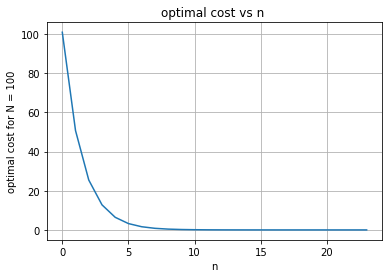

In [56]:
new = []
for i in range(1,25):
    new.append(convex_optimisation_new(i,100)[0])
plt.grid()
plt.xlabel("n")
plt.ylabel("optimal cost for N = 100")
plt.title("optimal cost vs n ")
plt.plot(new)
plt.show()